# TECHNOHACKS INTERNSHIP

In [23]:
#Our first task is to read the dataset.
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic.csv')

In [24]:
#the shape of the dataset.

titanic.shape

(891, 12)

In [25]:
# Check the first few rows of the DataFrame
titanic.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G,S,0


In [198]:
titanic.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.45,F,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,C,C,1
890,891,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,G,Q,0


In [199]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [200]:
titanic.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [201]:
titanic.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

## Task 1

# Data Cleaning

In [202]:
titanic.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,True,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [203]:
#Handling missing values
titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Survived         0
dtype: int64

In [28]:
mean_age = titanic['Age'].mean()
mean_age


29.69911764705882

In [29]:
titanic['Age'].fillna(mean_age , inplace = True)

In [30]:
titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [33]:
#handling outliers

import pandas as pd
q1_age = np.percentile(titanic['Age'],25)
q3_age = np.percentile(titanic['Age'],75)
iqr = q3_age - q1_age
lower_limit = q1_age - iqr*1.5
upper_limit = q3_age + iqr*1.5
outliers_age = (titanic['Age'] > upper_limit) | (titanic['Age'] < lower_limit)



Q1_fare = titanic['Fare'].quantile(.25)
Q3_fare = titanic['Fare'].quantile(.75)
IQR = Q3_fare - Q1_fare
lower_limit = Q1_fare - iqr*1.5
upper_limit = Q3_fare + iqr*1.5
outliers_fares = (titanic['Fare'] > upper_limit) | (titanic['Fare'] < lower_limit) 


outliers_combined = outliers_fares | outliers_age
titanic_cleaned = titanic[~outliers_combined].copy()
titanic_cleaned

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,G,S,0
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,G,S,1
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,G,S,0
5,6,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,G,Q,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,G,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,C,1


In [34]:
titanic_cleaned.shape

(679, 12)

# Task 2

# Summary Statistics

In [150]:
titanic.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [155]:
print("Mean of age : ", titanic['Age'].mean())
print("Median of age : " , titanic['Age'].median())
print("Standard Deviation of age : ", titanic['Age'].std())
print("Mode of age : ", titanic['Age'].value_counts().idxmax())



Mean of age :  29.69911764705882
Median of age :  28.0
Standard Deviation of age :  14.526497332334044
Mode of age :  24.0


In [49]:
#OR
print("Mode of age : ", titanic['Age'].mode())

Mode of age :  0    24.0
Name: Age, dtype: float64


In [156]:
print("Mean of Fare : ", titanic['Fare'].mean())
print("Median of Fare : " , titanic['Fare'].median())
print("Standard Deviation of Fare: ", titanic['Fare'].std())
print("Mode of Fare : ", titanic['Fare'].mode())


Mean of Fare :  32.204207968574636
Median of Fare :  14.4542
Standard Deviation of Fare:  49.693428597180905
Mode of Fare :  0    8.05
Name: Fare, dtype: float64


In [159]:
titanic.duplicated().sum()

0

# Task 3

In [18]:
iris = pd.read_csv('Iris.csv')

In [5]:
iris.shape

(150, 6)

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [135]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [137]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Data Visualiztion

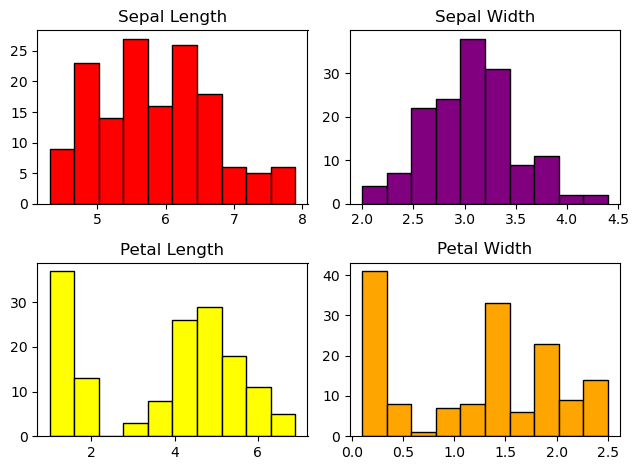

In [12]:
import matplotlib.pyplot as plt


plt.subplot(2, 2, 1)
plt.hist(iris['SepalLengthCm'], color="red", edgecolor='black')
plt.title('Sepal Length')

plt.subplot(2, 2, 2)
plt.hist(iris['SepalWidthCm'], color="purple", edgecolor='black')
plt.title('Sepal Width')

plt.subplot(2, 2, 3)
plt.hist(iris['PetalLengthCm'], color="yellow", edgecolor='black')
plt.title('Petal Length')

plt.subplot(2, 2, 4)
plt.hist(iris['PetalWidthCm'],color = "orange" ,edgecolor='black')
plt.title('Petal Width')

plt.tight_layout()  
plt.show()


# Task 4

In [4]:
import pandas as pd 
house_price = pd.read_csv("train.csv")
house_price.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
house_price.shape

(1460, 81)

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
house_price.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
house_price.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [38]:
house_price.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [47]:
table = house_price.pivot_table(index = "MSZoning" ,values = "MSSubClass"  )
table

,MSSubClass
MSZoning,
C (all),56.000000
FV,90.461538
RH,80.312500
RL,49.374457
RM,84.931193


<Axes: xlabel='MSZoning'>

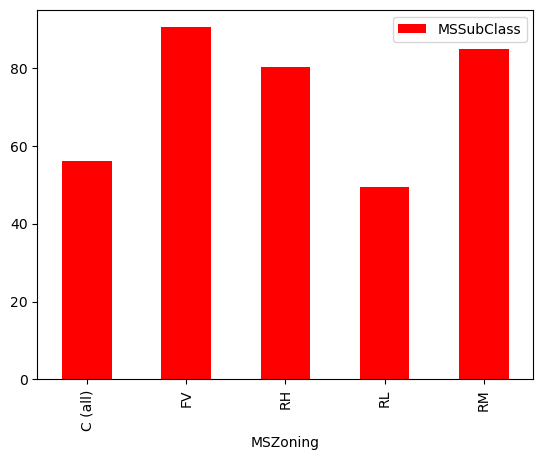

In [50]:
table.plot(kind ='bar', color ="red")

In [12]:
pivot_table  = pd.pivot_table(house_price , values = 'SalePrice',  index=[ 'SaleType' ] , aggfunc = 'mean')
pivot_table 

,SalePrice
SaleType,
COD,143973.255814
CWD,210600.000000
Con,269600.000000
ConLD,138780.888889
ConLI,200390.000000
ConLw,143700.000000
New,274945.418033
Oth,119850.000000
WD,173401.836622


<Axes: xlabel='SaleType'>

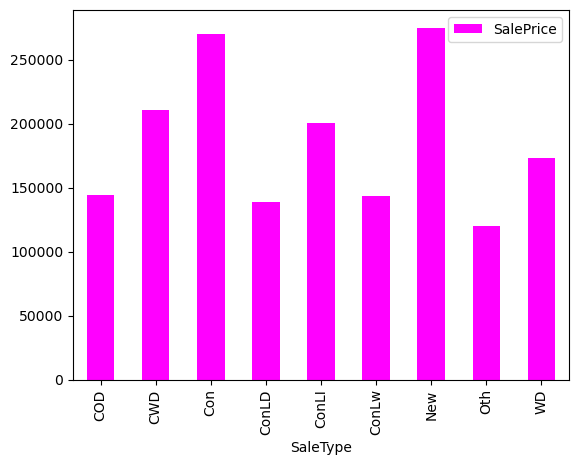

In [13]:
pivot_table.plot(kind ='bar', color = 'magenta')

In [58]:
a = house_price.pivot_table(index = "LotShape" , values = 'LotArea')
a

,LotArea
LotShape,
IR1,11894.545455
IR2,23733.658537
IR3,41338.200000
Reg,8876.915676


In [62]:
a = house_price.pivot_table(index = "LotShape" , values = 'LotArea')
a

,LotArea
LotShape,
IR1,11894.545455
IR2,23733.658537
IR3,41338.200000
Reg,8876.915676


<Axes: xlabel='LotShape'>

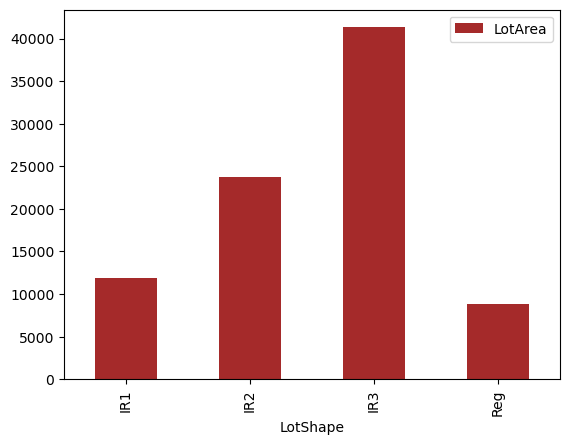

In [65]:
a.plot(kind='bar' , color = 'brown')

In [36]:
garge = house_price.pivot_table(index = "GarageType" , values = 'GarageArea')
garge

,GarageArea
GarageType,
2Types,919.500000
Attchd,524.587356
Basment,441.210526
BuiltIn,579.590909
CarPort,451.333333
Detchd,426.857881


<Axes: xlabel='GarageType'>

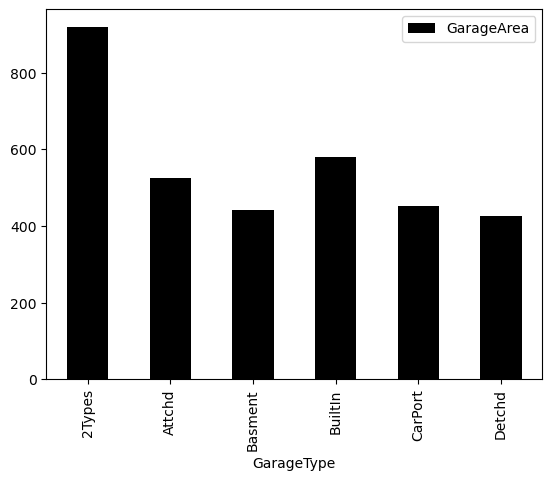

In [37]:
garge.plot(kind = 'bar', color = "black")

# Task 5

In [21]:
#finding duplicate values
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [19]:
iris.duplicated().sum()

0

In [66]:
iris.drop_duplicates()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## -Riya Rajput